# DATA ANALYSIS AND DATASCIENCE USING PYTHON
# Task 2: Data Analysis Project Using Python
Required libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Project 1: General EDA                            

# 1.Dataset Selection


In [8]:
df = pd.read_csv(r"C:\Users\pradi\Downloads\archive (8)\Global_Superstore2.csv", encoding="ISO-8859-1")

# 2. Tasks to Perform
# ○ Clean Data:

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [12]:
## Handling Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)

In [14]:
## Removing Duplicates
df.drop_duplicates(inplace=True)

In [15]:
## Detecting and Handling Outliers using IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# ○ Statistical Analysis:

In [19]:
#Statistical Analysis
print("Summary Statistics:")
print(df.describe())

print("Correlation Matrix:")
print(df.corr())

Summary Statistics:
             Row ID  Postal Code         Sales      Quantity      Discount  \
count  28949.000000      28949.0  28949.000000  28949.000000  28949.000000   
mean   21948.486614      56430.5    100.203369      3.025389      0.090520   
std    15054.223873          0.0    100.224363      1.866765      0.157232   
min        1.000000      56430.5      1.956000      1.000000      0.000000   
25%     9299.000000      56430.5     30.240000      2.000000      0.000000   
50%    19556.000000      56430.5     62.700000      3.000000      0.000000   
75%    29785.000000      56430.5    135.744000      4.000000      0.100000   
max    51290.000000      56430.5    581.250000      9.000000      0.500000   

             Profit  Shipping Cost  
count  28949.000000   28949.000000  
mean      14.289823       9.909052  
std       24.147503      10.716634  
min      -55.125000       0.000000  
25%        1.540000       2.520000  
50%        8.856000       5.920000  
75%       24.57000

Short Summary of Statistical Findings

Sales & Profit:

Average Sales: 100.20 (high variation, max 581.25).
Average Profit: 14.29 (ranges from -55.12 to 91.88).
Sales and profit have a moderate positive correlation (0.446), meaning higher sales generally lead to higher profits.
Discount Impact:

Average Discount: 9% (max 50%).
Negative correlation with profit (-0.481) suggests that increasing discounts reduces profitability.
Quantity & Shipping Cost:

Average Quantity Ordered: 3 (ranges from 1 to 9).
Higher shipping costs correlate strongly with sales (0.763), indicating that larger orders incur higher shipping fees.
Data Issues:

Postal Code column has no variation (56430.5 for all rows), making it irrelevant.

Key Takeaways:

✅ Higher sales generally lead to higher profits, but excessive discounts hurt profitability.

✅ Expensive shipments are linked to high-value orders.

✅ The Postal Code column should be removed or investigated.

# ○ Data Visualization:

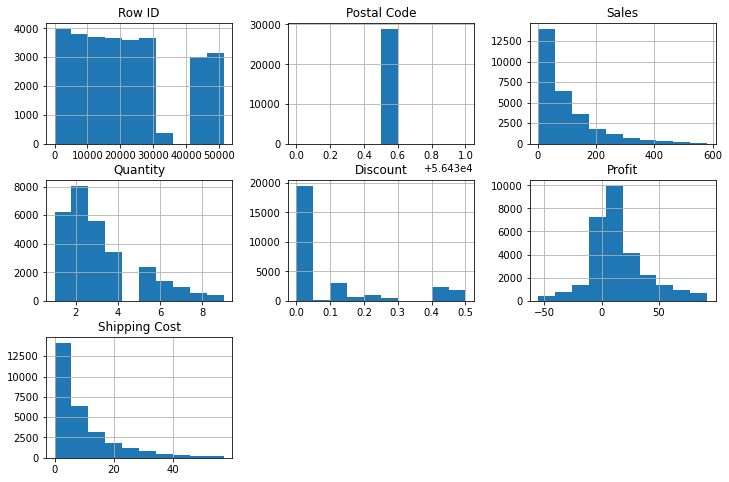

In [21]:
## Histograms for Numerical Columns
df.hist(figsize=(12, 8))
plt.show()

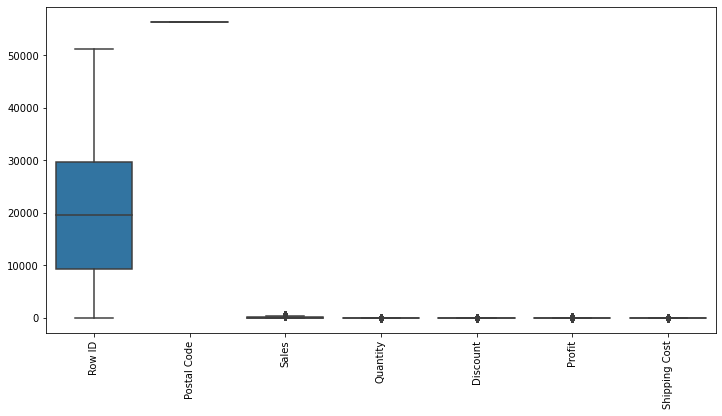

In [22]:
## Boxplots to Identify Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

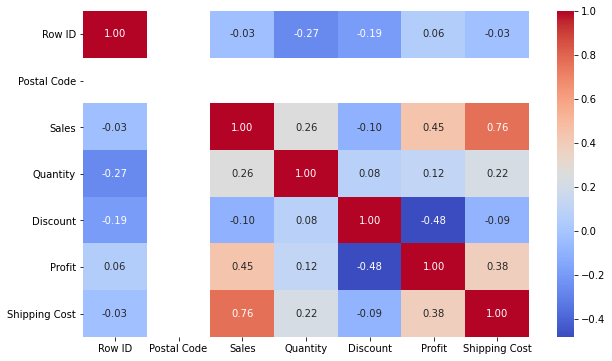

In [24]:
## Heatmap for Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Short Conclusion from Heatmap

1.Strong Positive Correlations:

Sales & Shipping Cost (0.76): Higher sales result in higher shipping costs.
Sales & Profit (0.45): More sales generally lead to higher profits.

2.Negative Impact of Discounts:

Discount & Profit (-0.48): Higher discounts significantly reduce profit.
Discount has weak correlations with Sales (−0.10) and Quantity (0.08), meaning increasing discounts does not strongly boost sales or quantity.

3.Other Observations:

Quantity has a weak correlation with both Sales (0.26) and Profit (0.12), meaning larger orders do not necessarily mean more profit.
The Postal Code column is irrelevant (no variation).

# Project 2: Sales Performance Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# ○ Load and Explore the Dataset

In [26]:
# Load dataset
df = pd.read_csv(r"C:\Users\pradi\Downloads\archive (8)\Global_Superstore2.csv", encoding="ISO-8859-1")

In [28]:
# Check dataset shape
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (51290, 24)


In [29]:
# Check missing values
print(df.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [30]:
## Handling Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)

In [31]:
# Check data types
print(df.dtypes)

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object


# ○ Data Cleaning:

In [32]:
# Remove duplicates
df = df.drop_duplicates()

In [33]:
# Fill missing values
df["Sales"].fillna(df["Sales"].median(), inplace=True)
df["Profit"].fillna(df["Profit"].median(), inplace=True)
df["Discount"].fillna(df["Discount"].median(), inplace=True)

In [36]:
# Convert 'Date' column to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

In [37]:
# Drop rows where Date conversion failed
df = df.dropna(subset=["Order Date"])

# ○ Exploratory Data Analysis:

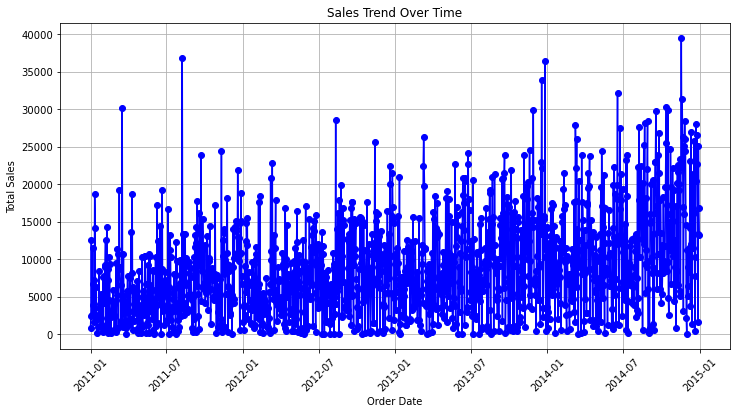

In [39]:
#1. Sales Trend Over Time
# Aggregate Sales by Date
sales_trend = df.groupby("Order Date")["Sales"].sum()
# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(sales_trend, marker="o", linestyle="-", color="b")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

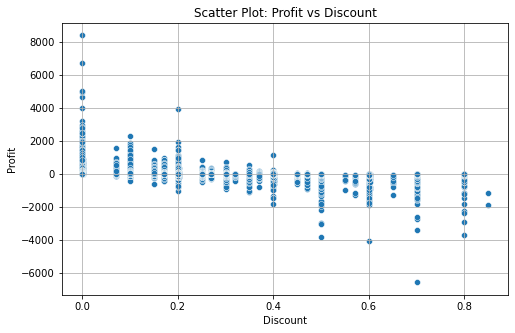

In [40]:
# Scatter Plot of Profit vs. Discount
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Discount"], y=df["Profit"])
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Scatter Plot: Profit vs Discount")
plt.grid()
plt.show()

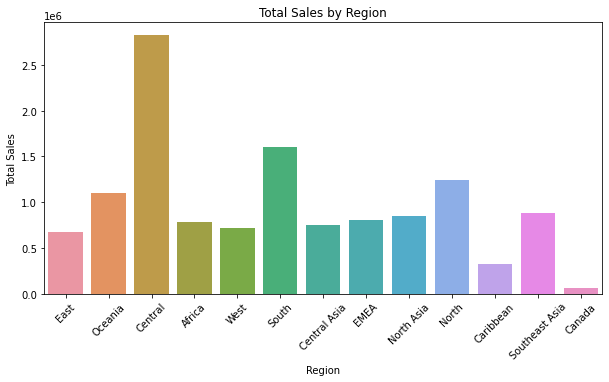

In [41]:
#Sales Distribution by Region and Category
# Bar plot for Sales by Region
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Region"], y=df["Sales"], estimator=sum, ci=None)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()

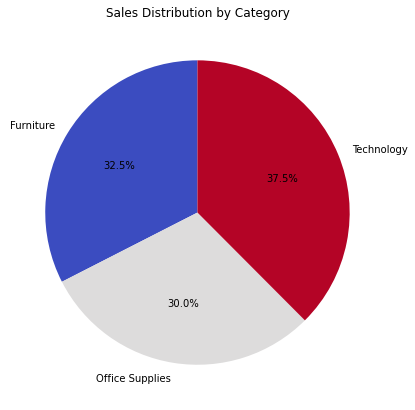

In [42]:
# Pie chart for Sales by Category
category_sales = df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(7, 7))
category_sales.plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.ylabel("")
plt.title("Sales Distribution by Category")
plt.show()

# ○ Predictive Modeling

In [43]:
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = df[["Profit", "Discount"]]
target = df["Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 221.94
Mean Squared Error: 187787.80
R² Score: 0.16


Model Performance Summary:

Mean Absolute Error (MAE): 221.94 → On average, the model's sales predictions are off by about $221.94.

Mean Squared Error (MSE): 187,787.80 → The squared differences between actual and predicted sales are quite large, indicating high variance.

R² Score: 0.16 → The model explains only 16% of the variance in Sales, meaning it's not a strong predictor.

Insights:

Low R² Score suggests that Profit and Discount alone are not sufficient predictors of Sales.

Consider adding more features like Region, Product Category, Customer Segment, or Marketing Spend to improve accuracy.

Explore non-linear models (e.g., Decision Trees, Random Forests) for better predictive performance.

# Insights & Recommendations

In [44]:
# Feature importance
coefficients = pd.DataFrame({"Feature": features.columns, "Coefficient": model.coef_})
print(coefficients)

# Recommendations
if model.coef_[1] < 0:
    print("Higher discounts reduce sales. Consider optimizing discount strategies.")
else:
    print("Higher discounts boost sales. Consider promotional campaigns.")

# Identify top-performing regions
top_regions = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
print("\nTop-performing regions:")
print(top_regions)

# Identify top-selling categories
top_categories = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print("\nTop-selling categories:")
print(top_categories)


    Feature  Coefficient
0    Profit     1.483111
1  Discount   189.265806
Higher discounts boost sales. Consider promotional campaigns.

Top-performing regions:
Region
Central           2.822303e+06
South             1.600907e+06
North             1.248166e+06
Oceania           1.100185e+06
Southeast Asia    8.844232e+05
North Asia        8.483098e+05
EMEA              8.061613e+05
Africa            7.837732e+05
Central Asia      7.528266e+05
West              7.254578e+05
East              6.787812e+05
Caribbean         3.242809e+05
Canada            6.692817e+04
Name: Sales, dtype: float64

Top-selling categories:
Category
Technology         4.744557e+06
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Name: Sales, dtype: float64


Summary of Insights:

Feature Importance & Recommendations:

Profit Coefficient: 1.48 → A 1 increase in profit leads to an estimated 1.48 increase in sales.

Discount Coefficient: 189.27 → Higher discounts significantly boost sales, suggesting that promotional campaigns can drive revenue.

Top-Performing Regions:

1.Central – Highest sales (~$2.82M)
2.South (1.60M)
3.North (1.25M)

Recommendation: Focus marketing efforts on Central & South regions to maximize sales.

Top-Selling Categories:

Technology (4.74M)
Furniture (4.11M)
Office Supplies (3.79M)

Recommendation: Technology products are the best sellers—consider expanding inventory & promotions in this category.